In [3]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# Step 2: Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, index_col='Month', parse_dates=True)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


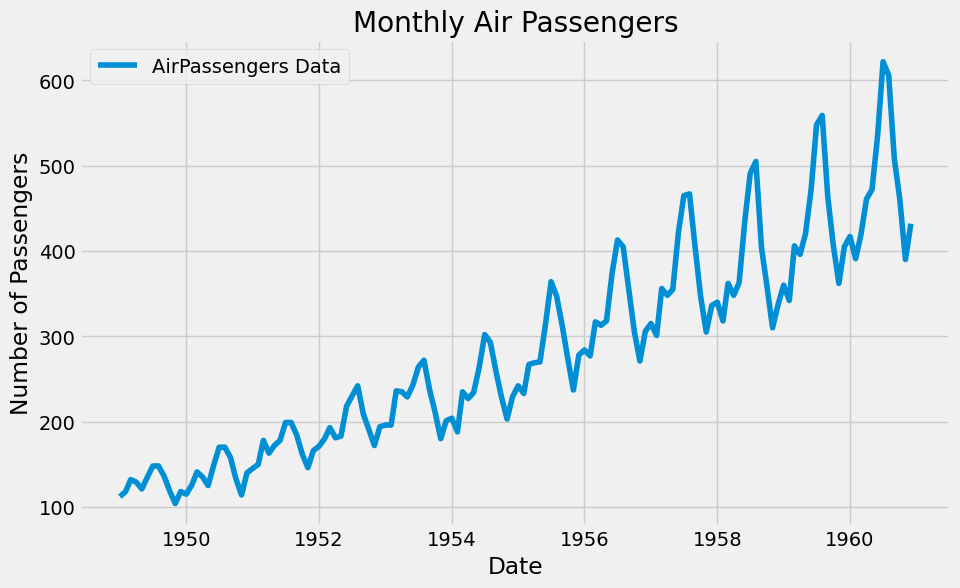

In [5]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data, label='AirPassengers Data')
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [6]:
# Step 3: Fit the ARIMA model
# (p, d, q) are the order parameters: p=AR lag order, d=differencing order, q=MA lag order
model = ARIMA(data, order=(5, 1, 2))  # You can try tuning (p,d,q)
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
# Step 4: Make predictions
forecast_steps = 24  # Forecast for 24 months into the future
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()  # Get the confidence intervals

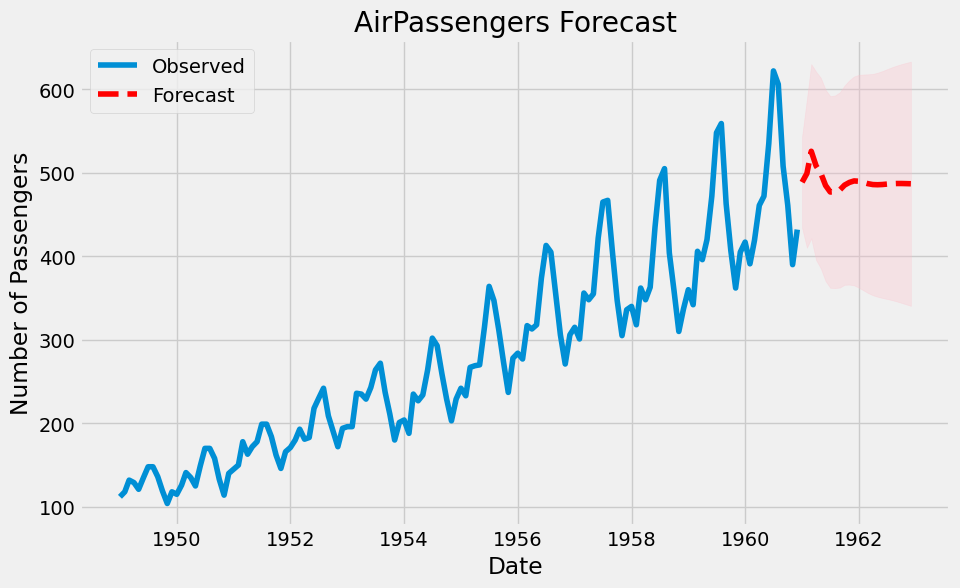

In [8]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('AirPassengers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()